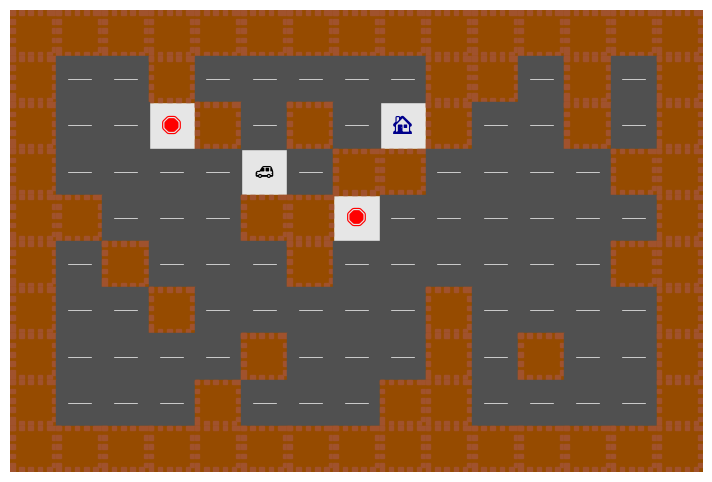

Move (w/a/s/d): w
No path found within the depth limit.


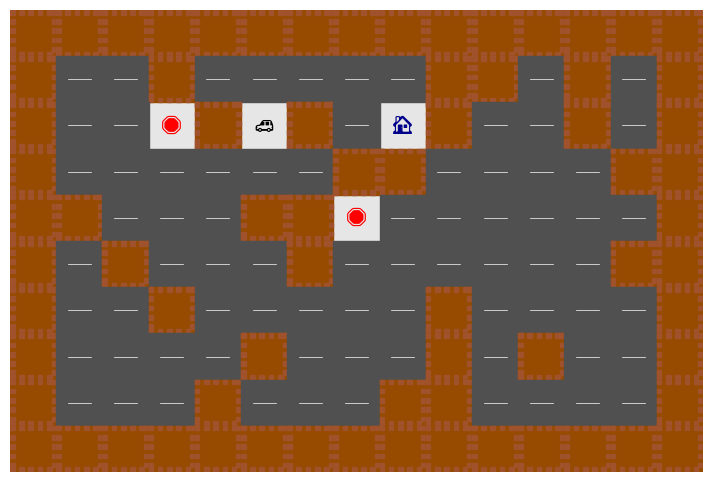

Move (w/a/s/d): w
No path found within the depth limit.


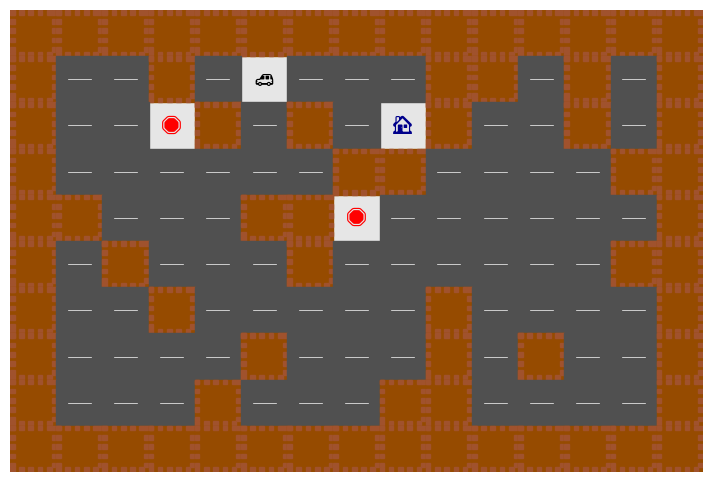

Move (w/a/s/d): d
No path found within the depth limit.


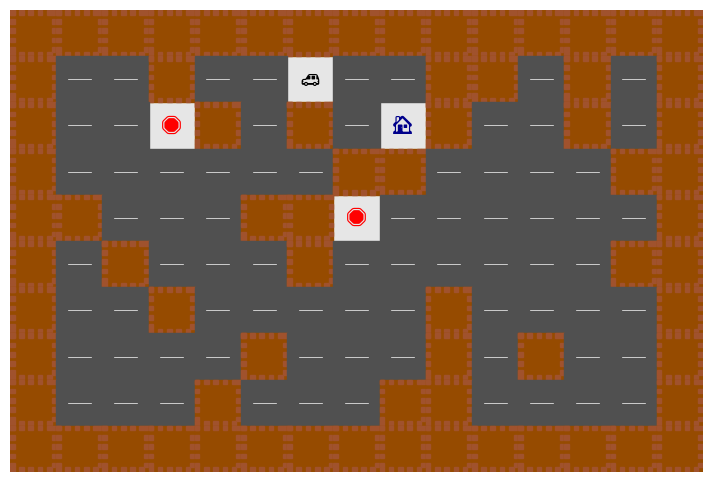

Move (w/a/s/d): d
No path found within the depth limit.


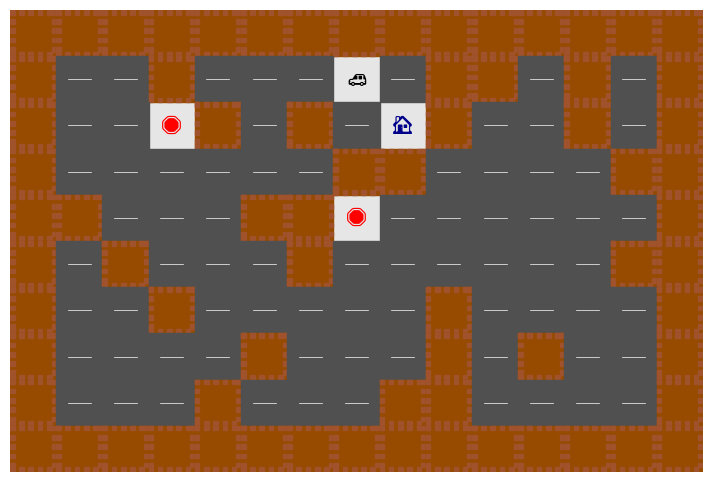

Move (w/a/s/d): s
Player's Path to Goal (Depth Limit: 1 ): [(2, 8), (2, 8)]


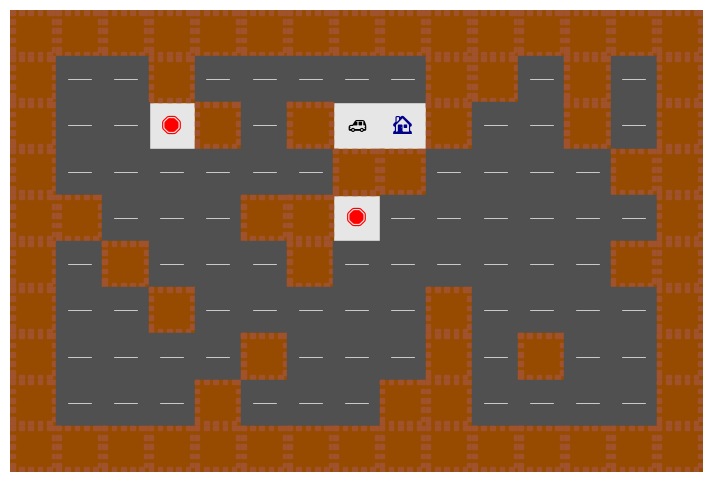

Move (w/a/s/d): d
Congratulations, you reached the goal!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

# Initialize the maze
maze_height, maze_width = 10, 15
maze = np.full((maze_height, maze_width), ' ', dtype=object)  # Use object dtype for mixed types
maze[0, :] = maze[-1, :] = maze[:, 0] = maze[:, -1] = '\u2588'  # Thick border walls

# Set player, checkpoint, and goal positions
player_position = (randint(1, maze_height - 2), randint(1, maze_width - 2))
goal_position = (randint(1, maze_height - 2), randint(1, maze_width - 2))
checkpoint_pos = []

# Ensure player, checkpoints, and goal don't overlap
while goal_position == player_position or goal_position in checkpoint_pos:
    goal_position = (randint(1, maze_height - 2), randint(1, maze_width - 2))

maze[player_position] = 'P'
maze[goal_position] = 'G'

# Generate checkpoints ensuring they don't come together
def generate_checkpoints(num_checkpoints):
    for _ in range(num_checkpoints):
        checkpoint_candidate = (randint(1, maze_height - 2), randint(1, maze_width - 2))
        while checkpoint_candidate in checkpoint_pos or any(abs(checkpoint_candidate[0] - cp[0]) <= 1 and abs(checkpoint_candidate[1] - cp[1]) <= 1 for cp in checkpoint_pos):
            checkpoint_candidate = (randint(1, maze_height - 2), randint(1, maze_width - 2))
        checkpoint_pos.append(checkpoint_candidate)

generate_checkpoints(2)  # Adjust the number of checkpoints as needed

for c in checkpoint_pos:
    maze[c] = 'C'
# Add more walls inside the maze
for _ in range(30):  # Increased number of walls
    wall_pos = (randint(1, maze_height - 2), randint(1, maze_width - 2))
    if wall_pos not in [player_position, goal_position] + checkpoint_pos:
        maze[wall_pos] = '\u2588'  # Thick block character

def draw_maze(maze):
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    ax.imshow(np.ones(maze.shape), cmap='gray', alpha=0.1)
    ax.axis('off')
    
    brick_width = 1
    brick_height = 1
    brick_color = '#964B00'  # Light red color for bricks
    mortar_color = '#A0522D'  # Brown color for mortar
    mortar_width = 0.1
    mortar_height = 0.1
    
    for (j, i), label in np.ndenumerate(maze):
        if label == 'P':  # Player represented by a car
            ax.text(i, j, '🚗', fontsize=12, va='center', ha='center', color='black', fontname='Segoe UI Emoji')
        elif label == 'C':  # Checkpoint
            ax.text(i, j, '🛑', fontsize=12, va='center', ha='center', color='red', fontname='Segoe UI Emoji')
        elif label == 'G':  # Goal represented by a house
            ax.text(i, j, '🏠', fontsize=12, va='center', ha='center', color='darkblue', fontname='Segoe UI Emoji')
        elif label == '\u2588':  # Wall (brick style with mortar)
            ax.add_patch(plt.Rectangle((i - 0.5, j - 0.5), brick_width, brick_height, color=brick_color))  # Brick
            # Draw horizontal mortar lines
            for offset in np.arange(0, brick_width, mortar_width * 2):
                ax.add_patch(plt.Rectangle((i - 0.5 + offset, j - 0.5), mortar_width, mortar_height, color=mortar_color))
                ax.add_patch(plt.Rectangle((i - 0.5 + offset, j + 0.5 - mortar_height), mortar_width, mortar_height, color=mortar_color))
            # Draw vertical mortar lines
            for offset in np.arange(0, brick_height, mortar_height * 2):
                ax.add_patch(plt.Rectangle((i - 0.5, j - 0.5 + offset), mortar_width, mortar_height, color=mortar_color))
                ax.add_patch(plt.Rectangle((i + 0.5 - mortar_width, j - 0.5 + offset), mortar_width, mortar_height, color=mortar_color))
                
        elif label == ' ':  # Road
            ax.add_patch(plt.Rectangle((i-0.5, j-0.5), 1, 1, color='#505050'))  # Dark gray for realistic asphalt
            ax.add_line(plt.Line2D([i-0.25, i+0.25], [j, j], color='white', linewidth=0.5))  # White line for road markings
    plt.show()

def move_player(direction, player_pos, maze):
    y, x = player_pos
    if direction == 'w' and maze[y-1, x] != '\u2588':
        return (y-1, x)
    elif direction == 's' and maze[y+1, x] != '\u2588':
        return (y+1, x)
    elif direction == 'a' and maze[y, x-1] != '\u2588':
        return (y, x-1)
    elif direction == 'd' and maze[y, x+1] != '\u2588':
        return (y, x+1)
    return player_pos

def ids(start, goal, depth, visited=None):
    if start == goal:
        return [start]
    if depth <= 0:
        return None
    if visited is None:
        visited = set()
    visited.add(start)
    for dy, dx in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
        y, x = start[0] + dy, start[1] + dx
        if 0 <= y < maze_height and 0 <= x < maze_width and maze[y, x] != '\u2588' and (y, x) not in visited:
            path = ids((y, x), goal, depth - 1, visited)
            if path is not None:
                return [(y, x)] + path
    return None

def game_loop():
    global player_position
    depth_limit = 1
    while True:
        draw_maze(maze)
        direction = input("Move (w/a/s/d): ").lower()
        if direction in ['w', 'a', 's', 'd']:
            new_pos = move_player(direction, player_position, maze)
            if new_pos == goal_position:
                print("Congratulations, you reached the goal!")
                break
            if new_pos in checkpoint_pos:
                print("Caught by a checkpoint! Game over.")
                break
            maze[player_position] = ' '
            player_position = new_pos
            maze[player_position] = 'P'
        else:
            print("Invalid move. Use w/a/s/d to move.")
        
        path = ids(player_position, goal_position, depth_limit)
        if path is not None:
            print("Player's Path to Goal (Depth Limit:", depth_limit, "):", path)
            depth_limit += 1
        else:
            print("No path found within the depth limit.")

game_loop()